In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [2]:
import pandas as pd
import requests
from io import StringIO

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv"

# Use requests to fetch the data
response = requests.get(URL)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Use StringIO to convert the response content into a file-like object
    text = StringIO(response.text)
    
    # Read the CSV into a DataFrame
    df = pd.read_csv(text)
    
    # Print a message
    print('Data downloaded and read into a dataframe!')
else:
    # Print an error message if the request was not successful
    print(f"Error: Unable to fetch data. Status code: {response.status_code}")


Data downloaded and read into a dataframe!


In [3]:
df

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1/31/1980,1980,Jan,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia
1,2/29/1980,1980,Feb,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York
2,3/31/1980,1980,Mar,1,107.48,0.20,28238.443,3137,3,35.141,-0.308614,3.4,620.0,Mediumfamilycar,New York
3,4/30/1980,1980,Apr,1,115.01,1.00,32615.149,1653,7,45.673,0.230596,4.2,702.8,Supperminicar,Illinois
4,5/31/1980,1980,May,1,98.72,0.20,23829.233,1319,4,52.997,0.138197,5.3,770.4,Smallfamiliycar,California
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
523,8/31/2023,2023,Aug,0,103.36,0.25,27852.993,1793,6,57.169,0.764155,2.6,1579.6,Executivecar,New York
524,9/30/2023,2023,Sep,0,101.55,0.07,21183.704,1028,5,59.315,0.036180,2.5,1123.4,Smallfamiliycar,California
525,10/31/2023,2023,Oct,0,124.66,0.12,15975.589,1148,9,19.472,-2.046169,2.5,1685.9,Sports,California
526,11/30/2023,2023,Nov,0,97.09,0.25,16862.288,4850,5,27.904,0.302179,2.9,2124.6,Smallfamiliycar,Georgia


In [30]:
df[df['Recession'] == 0]

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
113,2/28/1983,1983,Feb,0,126.06,0.75,15201.649,4621,4,12.819,-1.119666,2.4,3799.1,Sports,Georgia
114,3/31/1983,1983,Mar,0,92.67,1.50,18359.070,3038,8,12.945,0.009733,1.5,3533.5,Smallfamiliycar,California
115,4/30/1983,1983,Apr,0,96.39,1.00,25984.306,4490,8,25.206,0.486432,2.0,3240.4,Supperminicar,Illinois
116,5/31/1983,1983,May,0,91.81,1.50,28692.333,4677,8,14.630,-0.722898,2.3,908.1,Smallfamiliycar,California
117,6/30/1983,1983,Jun,0,106.16,0.75,25856.841,2118,5,18.765,0.220357,2.3,4769.8,Mediumfamilycar,Illinois
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
523,8/31/2023,2023,Aug,0,103.36,0.25,27852.993,1793,6,57.169,0.764155,2.6,1579.6,Executivecar,New York
524,9/30/2023,2023,Sep,0,101.55,0.07,21183.704,1028,5,59.315,0.036180,2.5,1123.4,Smallfamiliycar,California
525,10/31/2023,2023,Oct,0,124.66,0.12,15975.589,1148,9,19.472,-2.046169,2.5,1685.9,Sports,California
526,11/30/2023,2023,Nov,0,97.09,0.25,16862.288,4850,5,27.904,0.302179,2.9,2124.6,Smallfamiliycar,Georgia


In [4]:
df.describe()

,Year,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales
count,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000
mean,2001.500000,0.214015,101.140170,0.575795,24964.991956,3067.456439,6.064394,40.073903,-0.242001,2.453977,2352.718068
std,12.710467,0.410526,10.601154,0.454477,4888.073433,1139.564637,1.968350,16.249714,0.861268,1.119019,1645.321284
min,1980.000000,0.000000,73.900000,0.000000,8793.663000,1009.000000,3.000000,12.508000,-4.227601,1.000000,102.000000
25%,1990.750000,0.000000,94.035000,0.250000,21453.300500,2083.500000,4.000000,27.237500,-0.574049,1.600000,793.950000
50%,2001.500000,0.000000,100.740000,0.500000,25038.691500,3072.000000,6.000000,39.214500,-0.013162,2.300000,2182.600000
75%,2012.250000,0.000000,108.240000,0.750000,28131.684750,4067.250000,8.000000,53.506500,0.388932,2.900000,3614.800000
max,2023.000000,1.000000,131.670000,1.500000,44263.657000,4983.000000,9.000000,70.374000,0.815074,6.000000,21147.000000


In [5]:
df.columns

Index(['Date', 'Year', 'Month', 'Recession', 'Consumer_Confidence',
       'Seasonality_Weight', 'Price', 'Advertising_Expenditure', 'Competition',
       'GDP', 'Growth_Rate', 'unemployment_rate', 'Automobile_Sales',
       'Vehicle_Type', 'City'],
      dtype='object')

In [6]:
df_mean = df.groupby('Year')['Automobile_Sales'].mean()
df_mean = pd.DataFrame(df_mean)

<Figure size 1000x600 with 0 Axes>

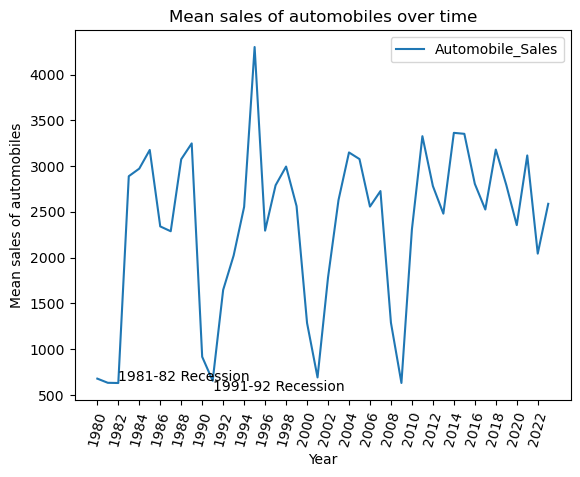

In [14]:
#line1_plot1
plt.figure(figsize=(10,6))
df_mean.plot(kind='line')
plt.xticks(list(range(1980,2023,2)), rotation=75)
plt.ylabel('Mean sales of automobiles')
plt.title('Mean sales of automobiles over time')
plt.text(1982, 650, '1981-82 Recession')
plt.text(1991, 550, '1991-92 Recession')
plt.legend()
plt.show()

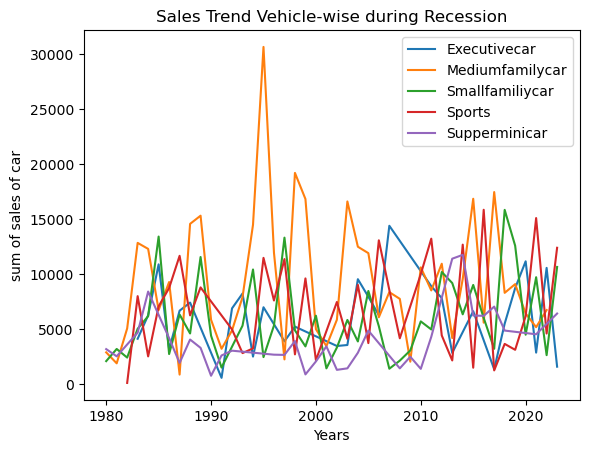

In [26]:
#line plot2
df_Mline = df.groupby(['Year','Vehicle_Type'], as_index=False)['Automobile_Sales'].sum()
df_Mline.set_index('Year', inplace=True)
df_Mline = df_Mline.groupby(['Vehicle_Type'])['Automobile_Sales']
df_Mline.plot(kind='line')
plt.xlabel('Years')
plt.ylabel('sum of sales of car')
plt.title('Sales Trend Vehicle-wise during Recession')
plt.legend()
plt.show()

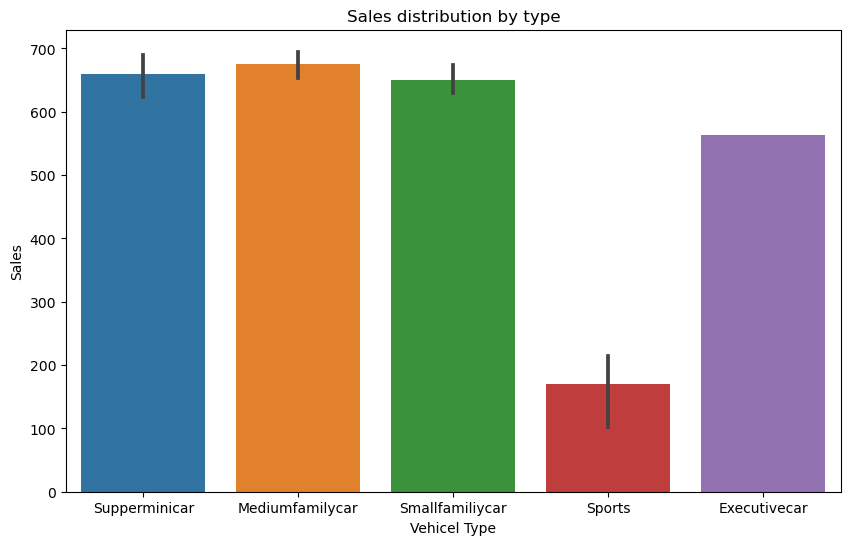

In [36]:
# bar chart
# choose (0, no recession) and (1, recession)
plt.figure(figsize=(10, 6))
sns.barplot(data=df[df['Recession'] == 1], x='Vehicle_Type', y='Automobile_Sales')
plt.xlabel('Vehicel Type')
plt.ylabel('Sales')
plt.title('Sales distribution by type')
plt.show()

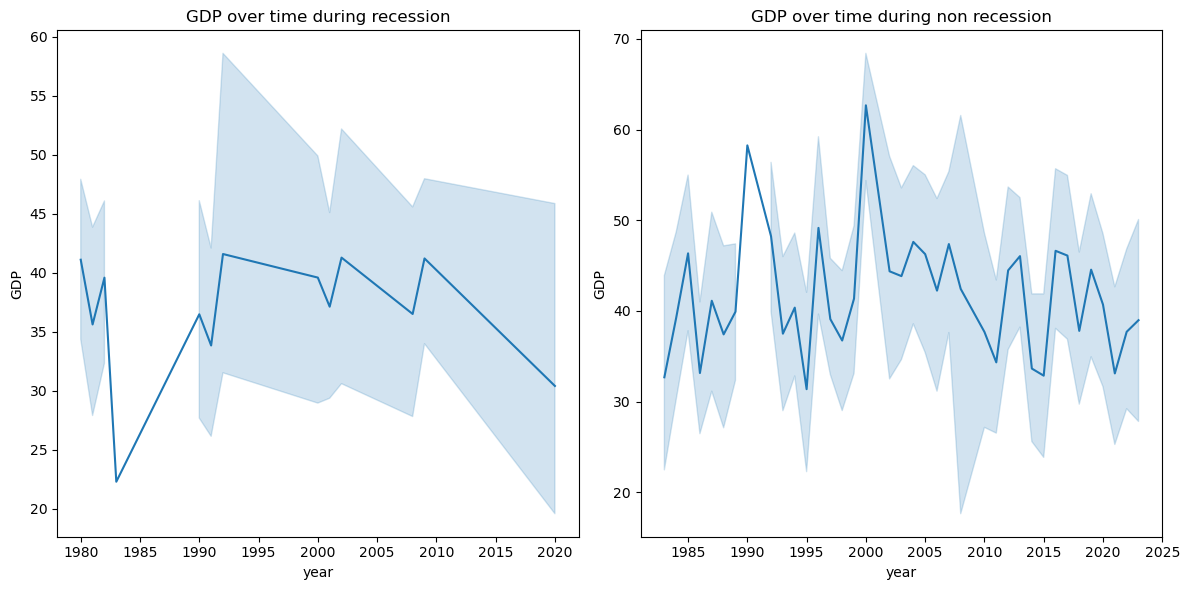

In [39]:
#subplot
rec_data = df[df['Recession']==1]
norec_data = df[df['Recession']==0]

fig = plt.figure(figsize=(12,6))

ax0= fig.add_subplot(1,2, 1)
ax1= fig.add_subplot(1,2,2)

sns.lineplot(x='Year', y='GDP', data = rec_data, ax=ax0)
ax0.set_xlabel('year')
ax0.set_ylabel('GDP')
ax0.set_title('GDP over time during recession')

sns.lineplot(x='Year', y='GDP', data = norec_data, ax=ax1)
ax1.set_xlabel('year')
ax1.set_ylabel('GDP')
ax1.set_title('GDP over time during non recession')

plt.tight_layout()
plt.show()

In [41]:
set(df['Seasonality_Weight'])

{0.0, 0.07, 0.12, 0.2, 0.25, 0.34, 0.5, 0.75, 1.0, 1.5}

Text(0.5, 1.0, 'Seasonality impact on Automobile Sales')

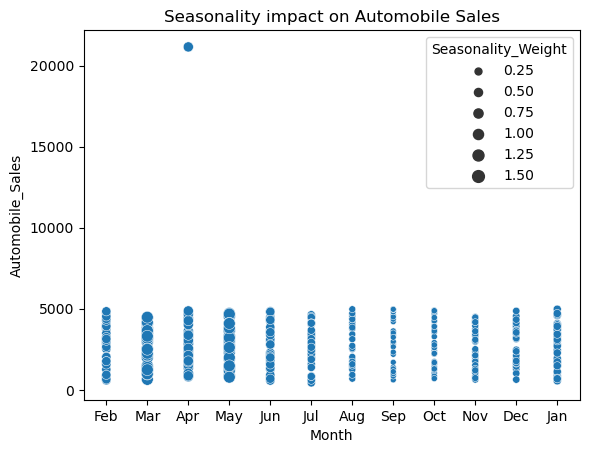

In [50]:
#buble_pnd
#change here for non rec and rec data
data_ = df[df['Recession']==0] 
size = data_['Seasonality_Weight']
sns.scatterplot(data = data_, x='Month', y='Automobile_Sales', size=size)
plt.xlabel('Month')
plt.ylabel('Automobile_Sales')
plt.title('Seasonality impact on Automobile Sales')

Text(0.5, 1.0, 'Consumer Confidance impact on Automobile Sales')

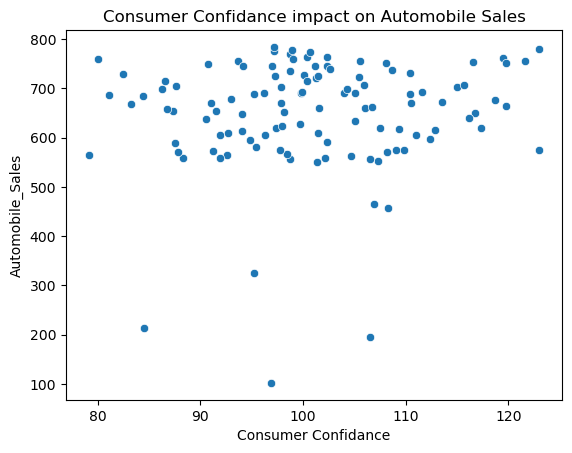

In [51]:
# Scatter plot
data_rec= df[df['Recession']== 1]
sns.scatterplot(data=data_rec, x='Consumer_Confidence', y='Automobile_Sales')
plt.xlabel('Consumer Confidance')
plt.ylabel('Automobile_Sales')
plt.title('Consumer Confidance impact on Automobile Sales')

Text(0.5, 1.0, 'Price impact on Automobile Sales')

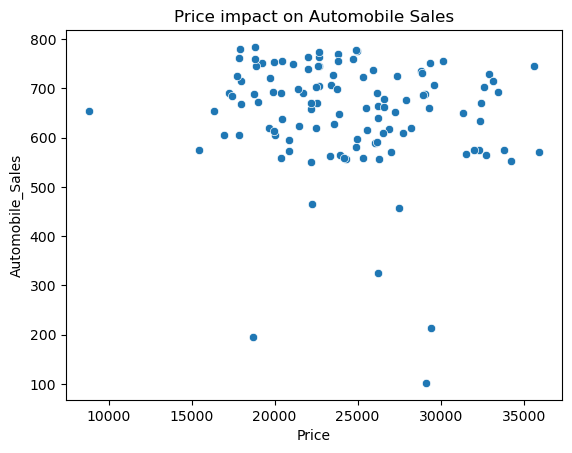

In [52]:
#Scatter plot
sns.scatterplot(data=data_rec, x='Price', y='Automobile_Sales')
plt.xlabel('Price')
plt.ylabel('Automobile_Sales')
plt.title('Price impact on Automobile Sales')

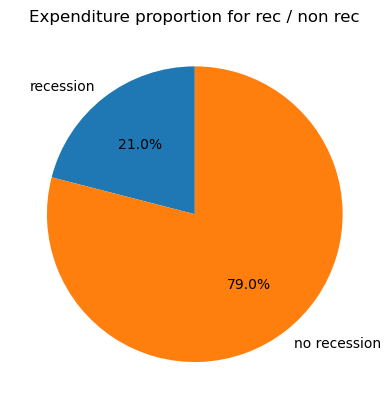

In [58]:
# pie 1
# advertising spend during rec and non rec
rdata = df[df['Recession']==1]
nrdata = df[df['Recession']==0]

rtotal = rdata['Advertising_Expenditure'].sum()
nrtotal = nrdata['Advertising_Expenditure'].sum()

sizes = [rtotal, nrtotal]
label = ['recession', 'no recession']

plt.pie(sizes, labels = label,autopct='%1.1f%%',  startangle=90)
plt.title('Expenditure proportion for rec / non rec')
plt.show()

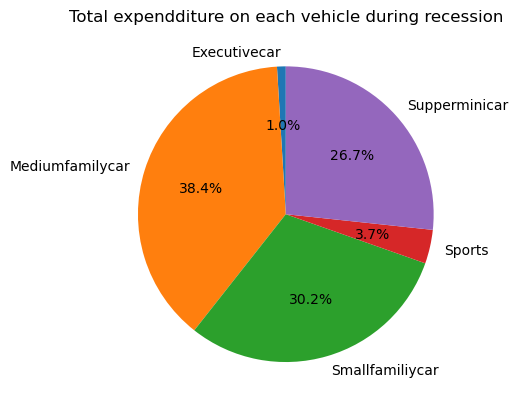

In [77]:
#pie_2
df_veh = rdata.groupby('Vehicle_Type')['Advertising_Expenditure'].sum()
df_veh = pd.DataFrame(df_veh)
sizes1 = df_veh['Advertising_Expenditure'].values
label1 = df_veh.index

plt.pie(sizes1, labels = label, autopct='%1.1f%%', startangle=90)
plt.title('Total expendditure on each vehicle during recession')
plt.show()

C:\Users\AnandMukul\AppData\Local\Temp\ipykernel_13588\1950315759.py:2: UserWarning: 
The markers list has fewer values (1) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data = rdata, x='unemployment_rate', y = 'Automobile_Sales', hue='Vehicle_Type',


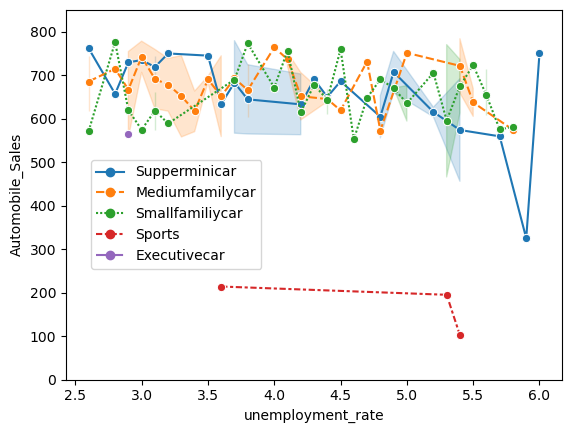

In [90]:
# line plot 3
sns.lineplot(data = rdata, x='unemployment_rate', y = 'Automobile_Sales', hue='Vehicle_Type',
             style='Vehicle_Type', markers='o')

plt.ylim(0, 850)
plt.legend(loc=(0.05,.3))

In [8]:
import dash
from dash import dcc
from dash import html
from dash.dependencies import Input, Output
import plotly.graph_objects as go
import plotly.express as px

# now creating a dashboard

app = dash.Dash(__name__)

app.layout = html.Div(children=[ html.H1('Automobile sales statistics Dashboard', style={'textAlign': 'center', 'color': '#503D36', 'font-size': 25}),
                                html.Div(["Input Year: ", dcc.Input(id = 'input-year', value='2010', type='number',
                                           style={'height':'25px', 'font-size': 10}),],
                                style={'font-size': 25}),
                                html.Br(),
                                html.Br(),
                                # yearly average automobile sales using line chart
                                html.Div(html.Div(dcc.Graph(id='average-line'), style={'width': '65%'} )),
                                
                                # total monthly sales using line and average monthly sales for diff vehicle bar chart
                                html.Div([
                                            html.Div(dcc.Graph(id='totalmo-line')),
                                            html.Div(dcc.Graph(id='average-bar'))
                                    
                                ], style={'display':'flex'}),
                                
                                # pie chart total expenditure for each vehicle
                                html.Div(html.Div(dcc.Graph(id='total-pie'), style={'width':'65%'})),
                                
                                html.Br(),
                                html.Br(),
                                
                                #Recession period graphs
                                
                                # average automobile sales using line chart and vehicle sold by diff vehicle type
                                html.Div([
                                            html.Div(dcc.Graph(id='recaverage-line')),
                                            html.Div(dcc.Graph(id='recavg-bar'))
                                    
                                    
                                ], style={'display':'flex'}),
                                
                                # pie for expenditure and effect of unemployement
                                html.Div([
                                            html.Div(dcc.Graph(id='rectotal-pie')),
                                            html.Div(dcc.Graph(id='unemp-bar'))
                                    
                                    
                                ], style={'display':'flex'}),
                                
                        ])


# adding computing info
def compute_info(df, entered_year):
    rec_data = df[df['Recession'] == 1]
    
    # plotting input year graphs
    
    #automobile yearly average sales 
    avg_yaas = df.groupby('Year')['Automobile_Sales'].mean().reset_index()
    
    #for monthly plots
    mo_data = df[df['Year'] == int(entered_year)]
    
    # total sales per month in the given year
    sum_mon = mo_data.groupby('Month')['Automobile_Sales'].sum().reset_index()
    
    # nothing required for average monthly sales for diff vehicles can be done independently
    
    # pie total expenditure adv for each vehicle
    df_pie = mo_data.groupby('Vehicle_Type')['Advertising_Expenditure'].sum().reset_index()
    
    # plotting for recession period statistics
    
    # average automotive sale in recession period
    avg_yaas_rec = rec_data.groupby('Year')['Automobile_Sales'].mean().reset_index()
    
    # average no of vehicle sold by vehicle type can be done indepedently return rec_data exclusively for 
    
    #total expenditure using pie in rec
    df_pierec = rec_data.groupby('Vehicle_Type')['Advertising_Expenditure'].sum().reset_index()
    
    #effect of uneployement can be shown directly using rec_data
    return rec_data, avg_yaas, mo_data, sum_mon, df_pie, avg_yaas_rec, df_pierec

# callback decorator
@app.callback([
    
                    Output(component_id='average-line', component_property='figure'),
                    Output(component_id='totalmo-line', component_property='figure'),
                    Output(component_id='average-bar', component_property='figure'),
                    Output(component_id='total-pie', component_property='figure'),
                    Output(component_id='recaverage-line', component_property='figure'),
                    Output(component_id='recavg-bar', component_property='figure'),
                    Output(component_id='rectotal-pie', component_property='figure'),
                    Output(component_id='unemp-bar', component_property='figure'),
                    ],
                     Input(component_id='input-year', component_property='value'))
    
# using computations to get the graphs

def get_graph(entered_year):
    rec_data, avg_yaas, mo_data, sum_mon, df_pie, avg_yaas_rec, df_pierec = compute_info(df, entered_year)
    
    # plotting the graphs for different kpi's
    
    # yearly automobile sales using line chart for whole period
    average_line = px.line(avg_yaas, x='Year', y='Automobile_Sales')
    
    # total monthly automotive sales using line
    totalmo_line = px.line(mo_data, x='Month', y='Automobile_Sales')
    
    # average monthly automobile sale for difftype of vehicle using bar
    average_bar = px.bar(df, x='Month', y='Automobile_Sales')
    
    # total expenditure for each vechicle using pie
    df_pie = pd.DataFrame(df_pie)
    size1 = df_pie['Advertising_Expenditure'].values
    label1 = df_pie['Vehicle_Type'].values
    total_pie = px.pie(size1, values='size1', names='label1')
    
    # Recession period graphs
    
    # average automobile sales in recession period
    recaverage_line = px.line(avg_yaas_rec, x='Year', y='Automobile_Sales')
    
    # average no of vehicle sold during recession period by type
    recavg_bar = px.bar(rec_data, x ='Year', y='Automobile_Sales')
    
    # totalexpenditure share by vehicle type during recession
    df_pierec = pd.DataFrame(df_pierec)
    size2 = df_pierec['Advertising_Expenditure'].values
    label2 = df_pierec['Vehicle_Type'].values
    rectotal_pie = px.pie(size2, values='size2', names='label2')
    
    # effect of unemployemet on vehicle type and sales
    unemp_bar = px.bar(data=rec_data, x='unemployment_rate', y='Automobile_Sales')
    
    return[average_line, totalmo_line, average_bar, total_pie, recaverage_line, recavg_bar, rectotal_pie, unemp_bar]


# Run the app

if __name__ == '__main__':
    app.run_server()
    


[2024-02-02 17:41:51,515] ERROR in app: Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\Users\AnandMukul\anaconda3\Lib\site-packages\flask\app.py", line 2525, in wsgi_app
    response = self.full_dispatch_request()
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\AnandMukul\anaconda3\Lib\site-packages\flask\app.py", line 1822, in full_dispatch_request
    rv = self.handle_user_exception(e)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\AnandMukul\anaconda3\Lib\site-packages\flask\app.py", line 1820, in full_dispatch_request
    rv = self.dispatch_request()
         ^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\AnandMukul\anaconda3\Lib\site-packages\flask\app.py", line 1796, in dispatch_request
    return self.ensure_sync(self.view_functions[rule.endpoint])(**view_args)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\AnandMukul\anaconda3\Lib\site-packages\dash\dash.py", line 1310, in 

<Axes: xlabel='Automobile_Sales', ylabel='Vehicle_Type'>

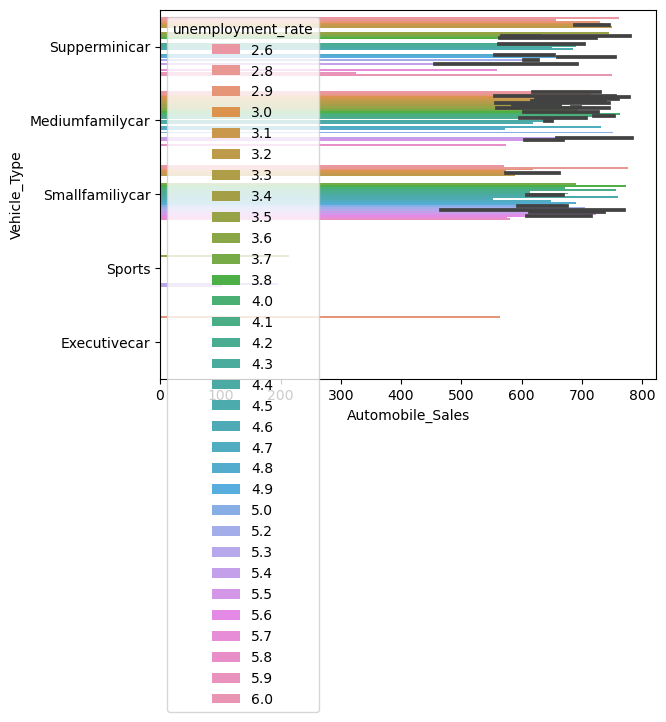

In [108]:
re = df[df['Recession'] == 1]
sns.barplot(data = re, x = 'Automobile_Sales', y='Vehicle_Type', hue='unemployment_rate')
